In [14]:
import numpy as np
import pandas as pd
import math
from sklearn.datasets import fetch_mldata
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_distances
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from collections import defaultdict
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster

# Problem 5

In [2]:
data = pd.read_csv("/Users/sasankauppu/Desktop/Data Mining CS6220/DataMining/dbscan.csv")


In [3]:
def simpledbscan(data):
    labels=[False for i in range(len(data))]
    clusterIndex=1
    
    for p in range(0,len(data)):                                          
        if not labels[p]:                                                 
            Neighbors = [int(i) for i in data["neighbors"][p].split(',')]                   
            
            if(len(Neighbors)<3):                                    
                labels[p]=-1
            else:                                  
                labels[p] = clusterIndex
                i=0
                while i < len(Neighbors):
                    if labels[Neighbors[i]] == -1:
                        labels[Neighbors[i]] = clusterIndex
                    elif not labels[Neighbors[i]]:
                        labels[Neighbors[i]] = clusterIndex
                        ExtraNeighbors = [int(j) for j in data["neighbors"][Neighbors[i]].split(',')]    
                        
                        if(len(ExtraNeighbors)>=3):
                            Neighbors = np.append(Neighbors,ExtraNeighbors)
                    i=i+1
                    
                clusterIndex +=1  
                
    return labels


In [4]:
data["cluster"]=simpledbscan(data)

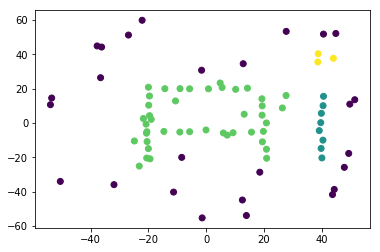

In [5]:
plt.scatter(data["x"],data["y"],c=data["cluster"])
plt.show()

In [6]:
def dbscan(data, eps, minpts=3,euclidean=True):
    labels=[False for i in range(len(data))]
    clusterIndex=1
    
    if(euclidean):
        mat = euclidean_distances(data)
    else:
        mat = cosine_distances(data)
        
    for p in range(0,len(data)):                                          # Iterate over every point
        if not labels[p]:                                                 # Skip processed points
            Neighbors = np.ix_(mat[p]<eps)[0].tolist()                    # Find initial neighbors
            
            if(len(Neighbors)<minpts):                                    # Non-core points are noise
                labels[p]=-1
            else:                                  
                labels[p] = clusterIndex
                i=0
                while i < len(Neighbors):
                    if labels[Neighbors[i]] == -1:
                        labels[Neighbors[i]] = clusterIndex
                    elif not labels[Neighbors[i]]:
                        labels[Neighbors[i]] = clusterIndex
                        ExtraNeighbors = np.ix_(mat[Neighbors[i]]<eps)[0].tolist()    # Expand neighborhood
                        if(len(ExtraNeighbors)>=minpts):
                            Neighbors = np.append(Neighbors,ExtraNeighbors)
                    i=i+1
                    
                clusterIndex +=1                                                  # Start a new cluster

    return labels

In [7]:
def runDbscanToy(data, eps, minpts):
    y=dbscan(data, eps, minpts)
    plt.scatter(data[data.columns[0]],data[data.columns[1]],c=y)
    plt.show()

# Problem 6

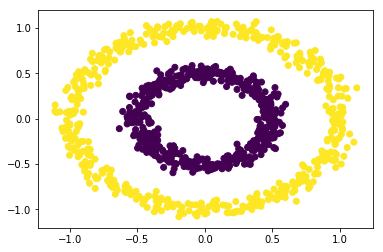

In [8]:
data = pd.read_csv("/Users/sasankauppu/Desktop/Data Mining CS6220/DataMining/circle.csv")
runDbscanToy(data,0.18,3)

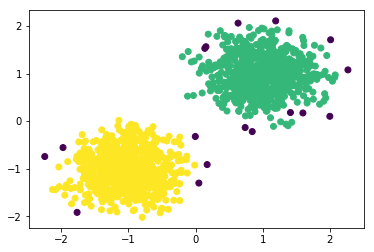

In [9]:
data = pd.read_csv("/Users/sasankauppu/Desktop/Data Mining CS6220/DataMining/blobs.csv")
runDbscanToy(data,0.18,3)

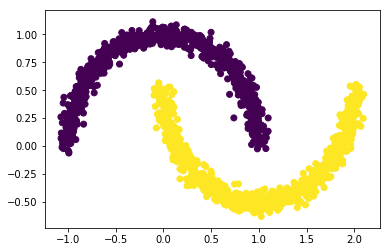

In [10]:
data = pd.read_csv("/Users/sasankauppu/Desktop/Data Mining CS6220/DataMining/moons.csv")
runDbscanToy(data,0.18,3)

# Problem 8

In [13]:
mnist = fetch_mldata('MNIST original', data_home="/Users/sasankauppu/Desktop/Data Mining CS6220/")
mnist_X = mnist.data
mnist_y = mnist.target
del(mnist)

In [165]:
def sample_data(data,label):
    dfn=pd.DataFrame(data)
    dfn["class"]=label
    dfarr=[]
    for i in range(10):
        dfarr.append(dfn[dfn["class"]==i].sample(5000))

    dfn = pd.concat(dfarr)
    
    y_actual = dfn["class"]
    del dfn["class"]
    
    return dfn,y_actual

In [35]:
def form_clusters(predlabel,origlabel):
    cluster=defaultdict(list)
    for i in range(len(predlabel)):
        cluster[predlabel[i]].append(origlabel[i])
    return cluster

In [41]:
def performance_calculator(cluster,categories):
    confusion_matrix=[]
    for i in cluster:
        countDict=defaultdict(int)
        for j in cluster[i]:
            countDict[j]+=1
    
        confusion_matrix.append([countDict[i] for i in range(categories)])
    
    
    numerator = 0
    denominator = 0
    for i in confusion_matrix:
        numerator+=max(i)
        denominator+=sum(i)
    
    purity = float(numerator)/float(denominator)
    
    gini_indexes=[]
    total=0
    for i in confusion_matrix:
        gi=1
        for j in i:
            
            gi-=((float(j)/float(sum(i)))**2)
        gini_indexes.append(gi*sum(i))
        total+=sum(i)
        
    gini = float(sum(gini_indexes))/float(total)
    
    return (purity,gini)

In [166]:
mn_x,mn_y = sample_data(mnist_X,mnist_y)

In [120]:
hc = linkage(mn_x,method='average')

In [223]:
labels = fcluster(hc,t=1.15470052)
clusters = form_clusters(labels,np.array(mn_y))
print "Clusters:",len(clusters)
p,g = performance_calculator(clusters,10)
print "Purity: ",p,"Gini: ",g

Clusters: 76
Purity:  0.58965 Gini:  0.507531959624


In [224]:
labels = fcluster(hc,t=1.1547004)
clusters = form_clusters(labels,np.array(mn_y))
print "Clusters:",len(clusters)
p,g = performance_calculator(clusters,10)
print "Purity: ",p,"Gini: ",g

Clusters: 145
Purity:  0.6066 Gini:  0.482311703716


In [228]:
labels = fcluster(hc,t=1.1547)
clusters = form_clusters(labels,np.array(mn_y))
print "Clusters:",len(clusters)
p,g = performance_calculator(clusters,10)
print "Purity: ",p,"Gini: ",g

Clusters: 231
Purity:  0.67155 Gini:  0.412232092932
